# Gisette Dataset
#####  GISETTE is a handwritten digit recognition problem.
#####  The problem is to separate the highly confusible digits '4' and '9'.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import csv
import sklearn
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Reducing the dataset using feature mean values:

#### Info regarding the data:

In [2]:
print(f'Some info on the provided Gisette data:\n')
with open('gisette.param') as csvfile:
    for row in csv.reader(csvfile):
        print(row[0])

Some info on the provided Gisette data:

Data type: non-sparse
Number of features: 5000
Number of examples and check-sums:
     	Pos_ex	Neg_ex	Tot_ex	Check_sum
Train	 3000	 3000	 6000	3164568508.00
Valid	  500	  500	 1000	535016668.00
Test	 3250	 3250	 6500	3431572010.00
All  	 6750	 6750	13500	7131157186.00


###### The provided dataset has labels available only for Train and Valid datasets so we made the decision to use Train dataset with its labels to train our machine and then check our machine's performance on the Valid dataset and its labels

#### Reading the Training Dataset and cleaning as needed

In [3]:
gisette_train_data = pd.read_csv('gisette_train.data', delimiter=' ', header=None)
gisette_train_data = gisette_train_data.dropna(axis=1, how='all')

gisette_train_data

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,783,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,921,0,886,0
5997,0,0,0,0,0,758,0,0,0,522,...,0,901,0,0,0,0,980,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,690,0,0,0,0,0


#### Reading True Positive & Negative Values (Labels) for the Training Dataset

In [4]:
reduced_train_labels = pd.read_csv('gisette_train.labels', delimiter=' ', header=None)

reduced_train_labels

,0
0,1
1,-1
2,1
3,1
4,1
...,...
5995,-1
5996,1
5997,-1
5998,-1


#### Merging the training dataset with its provided labels to perform Exploratory Analysis

In [5]:
merged_train_set = reduced_train_labels.merge(gisette_train_data, left_index=True,
                                              right_index=True).rename(columns={'0_y':0,'0_x':'Label'})

#---separating the merged training dataset based on their labels (-1 or 1)---
class_pos1 = merged_train_set[merged_train_set['Label'] == 1]
class_neg1 = merged_train_set[merged_train_set['Label'] == -1]

In [6]:
class_pos1

,Label,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,550,0,495,0,0,0,0,976,0,...,0,0,0,991,991,0,0,0,0,983
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,742,0,0,0,0,684,0,...,0,0,0,0,0,0,674,0,0,838
4,1,0,0,0,0,0,0,0,608,0,...,991,0,0,828,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,983,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5990,1,0,0,0,0,0,875,0,785,0,...,0,0,0,948,0,0,0,0,0,0
5992,1,0,0,0,0,0,0,472,976,0,...,987,0,0,0,0,0,0,0,486,0
5994,1,0,0,0,0,0,0,0,0,0,...,987,0,0,0,0,0,0,0,0,0


In [7]:
class_pos1.describe()

,Label,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1.0,110.157000,10.910000,105.272667,1.026667,15.965000,50.897000,16.417000,331.812000,2.199333,...,149.894333,66.492000,4.070667,319.516667,92.314333,45.49700,267.720667,4.268000,122.438333,86.353333
std,0.0,284.690282,89.410439,275.462363,26.568652,113.507831,195.249155,110.253295,420.954813,41.381144,...,329.584155,224.374042,59.023314,419.945725,272.612571,186.58644,396.404727,58.475442,293.965288,250.967786
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.250000,0.000000,...,0.000000,0.000000,0.000000,792.250000,0.000000,0.00000,668.750000,0.000000,0.000000,0.000000
max,1.0,999.000000,999.000000,999.000000,875.000000,991.000000,999.000000,991.000000,999.000000,991.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000


In [8]:
class_neg1

,Label,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
1,-1,0,0,0,0,0,0,0,976,0,...,0,475,0,991,0,0,991,0,0,0
8,-1,0,0,983,0,0,652,0,0,0,...,568,0,0,0,0,983,991,0,0,0
10,-1,0,0,0,0,0,0,0,607,0,...,0,991,0,991,603,0,0,0,0,0
11,-1,0,0,0,0,0,0,0,816,0,...,913,0,0,0,0,0,0,0,0,0
14,-1,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,-1,0,0,0,0,0,0,0,0,0,...,995,0,0,608,0,0,987,0,0,0
5995,-1,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,783,0,0,0
5997,-1,0,0,0,0,0,758,0,0,0,...,0,901,0,0,0,0,980,0,0,0
5998,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,690,0,0,0,0,0


In [9]:
class_neg1.describe()

,Label,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,...,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,-1.0,111.888667,11.592000,241.249667,0.875333,14.373333,49.521667,13.995667,314.334333,2.21600,...,240.447667,156.323000,0.0,317.562667,69.764667,44.057667,259.906667,25.173333,122.408667,220.918667
std,0.0,285.051042,93.456508,385.370652,24.953878,104.808484,194.144564,103.574168,415.742443,38.04845,...,398.002734,314.206212,0.0,421.781465,237.972746,183.978862,393.549409,138.785666,294.578273,375.954162
min,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-1.0,0.000000,0.000000,595.000000,0.000000,0.000000,0.000000,0.000000,776.000000,0.00000,...,588.000000,0.000000,0.0,789.000000,0.000000,0.000000,645.500000,0.000000,0.000000,517.250000
max,-1.0,999.000000,999.000000,999.000000,983.000000,999.000000,999.000000,999.000000,999.000000,902.00000,...,999.000000,999.000000,0.0,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000


#### Finding mean values for all 5000 attributes of the two separated datasets
#### Then filtering the attributes based on the absolute value of the difference between the two mean values being greater than 50

In [10]:
mean_class_pos1 = class_pos1.groupby('Label').mean()
mean_class_neg1 = class_neg1.groupby('Label').mean()

#---calculating difference between mean values of the features---
diff = mean_class_pos1.iloc[0] - mean_class_neg1.iloc[0]
diff

0        -1.731667
1        -0.682000
2      -135.977000
3         0.151333
4         1.591667
           ...    
4995      1.439333
4996      7.814000
4997    -20.905333
4998      0.029667
4999   -134.565333
Length: 5000, dtype: float64

In [11]:
#---filtering the values based on their absolute magnitude being greater than 50---
filt_diff = diff[(diff < -50) | (diff > 50)]
filt_diff

2      -135.977000
12     -218.859333
14       56.784667
16      -82.549000
34     -257.842667
           ...    
4980   -221.301333
4981   -267.497000
4990    -90.553333
4991    -89.831000
4999   -134.565333
Length: 864, dtype: float64

In [12]:
reduced_train_data = gisette_train_data[filt_diff.index]
reduced_train_data

,2,12,14,16,34,38,43,48,53,58,...,4966,4967,4976,4977,4979,4980,4981,4990,4991,4999
0,495,983,995,983,0,991,0,0,983,991,...,811,0,983,991,0,0,983,0,0,983
1,0,0,584,0,0,0,525,0,0,991,...,764,828,0,991,0,0,0,0,475,0
2,0,983,995,976,0,0,0,0,0,0,...,991,0,0,584,0,0,0,0,0,0
3,742,983,991,983,991,0,0,0,0,991,...,729,0,0,991,874,0,859,0,0,838
4,0,0,972,0,0,991,0,0,799,960,...,0,0,0,0,780,0,0,991,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,956,0,804,780,0,0,983,705,...,995,0,691,0,0,940,0,991,0,0
5996,0,0,991,0,0,0,0,0,0,991,...,0,0,0,0,991,0,0,0,0,0
5997,0,991,0,968,0,0,0,0,0,995,...,0,892,0,564,0,0,0,0,901,0
5998,0,0,729,504,0,0,0,0,0,995,...,0,0,0,995,0,0,484,0,0,0


#### Plotting the whole dataset's feature mean values

In [13]:
averages = merged_train_set.groupby('Label').mean().sort_index()

averages_transposed = averages.T  #---transposing the DataFrame---

#---plotting data's X-axis and Y-axis values---
x = averages_transposed.index
y1 = averages.values[0]
y2 = averages.values[1]

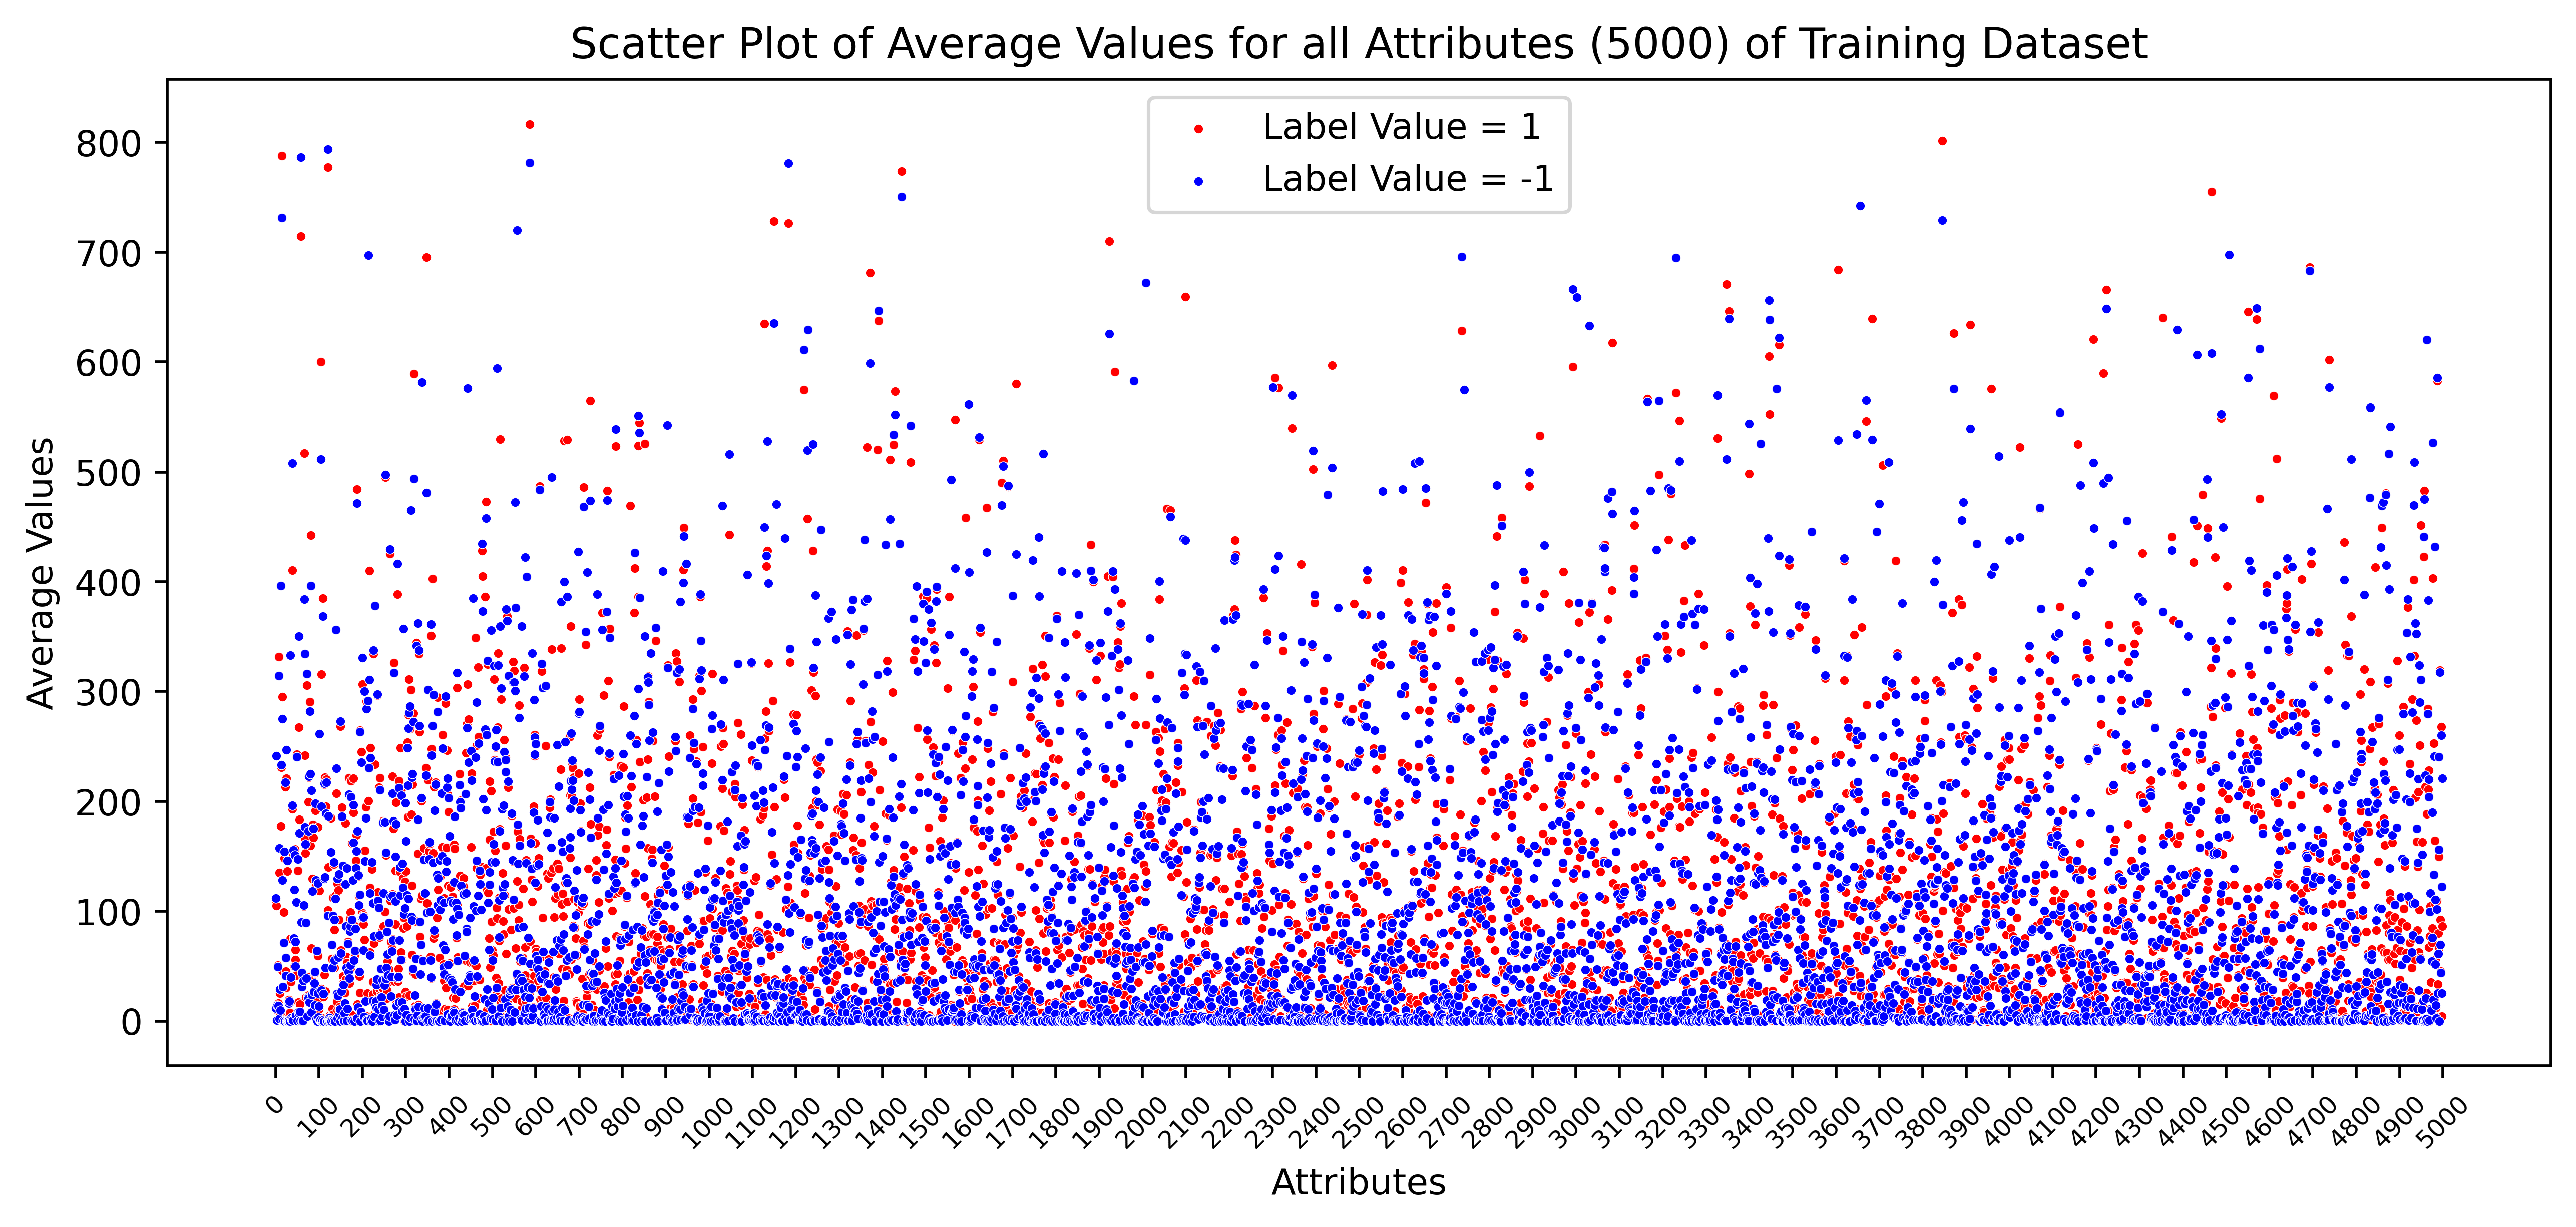

In [14]:
figure(figsize=(12, 5), dpi=512)

#---creating the scatter plot with different colored labels---
sns.scatterplot(x=x, y=y2, c='red', s=7, label='Label Value = 1')
sns.scatterplot(x=x, y=y1, c='blue', s=7, label='Label Value = -1')

plt.xlabel('Attributes')
plt.ylabel('Average Values')
plt.title('Scatter Plot of Average Values for all Attributes (5000) of Training Dataset')
plt.legend()
plt.xticks(ticks=np.arange(0,5001,100),labels=None,rotation=45,size=7)
plt.show()

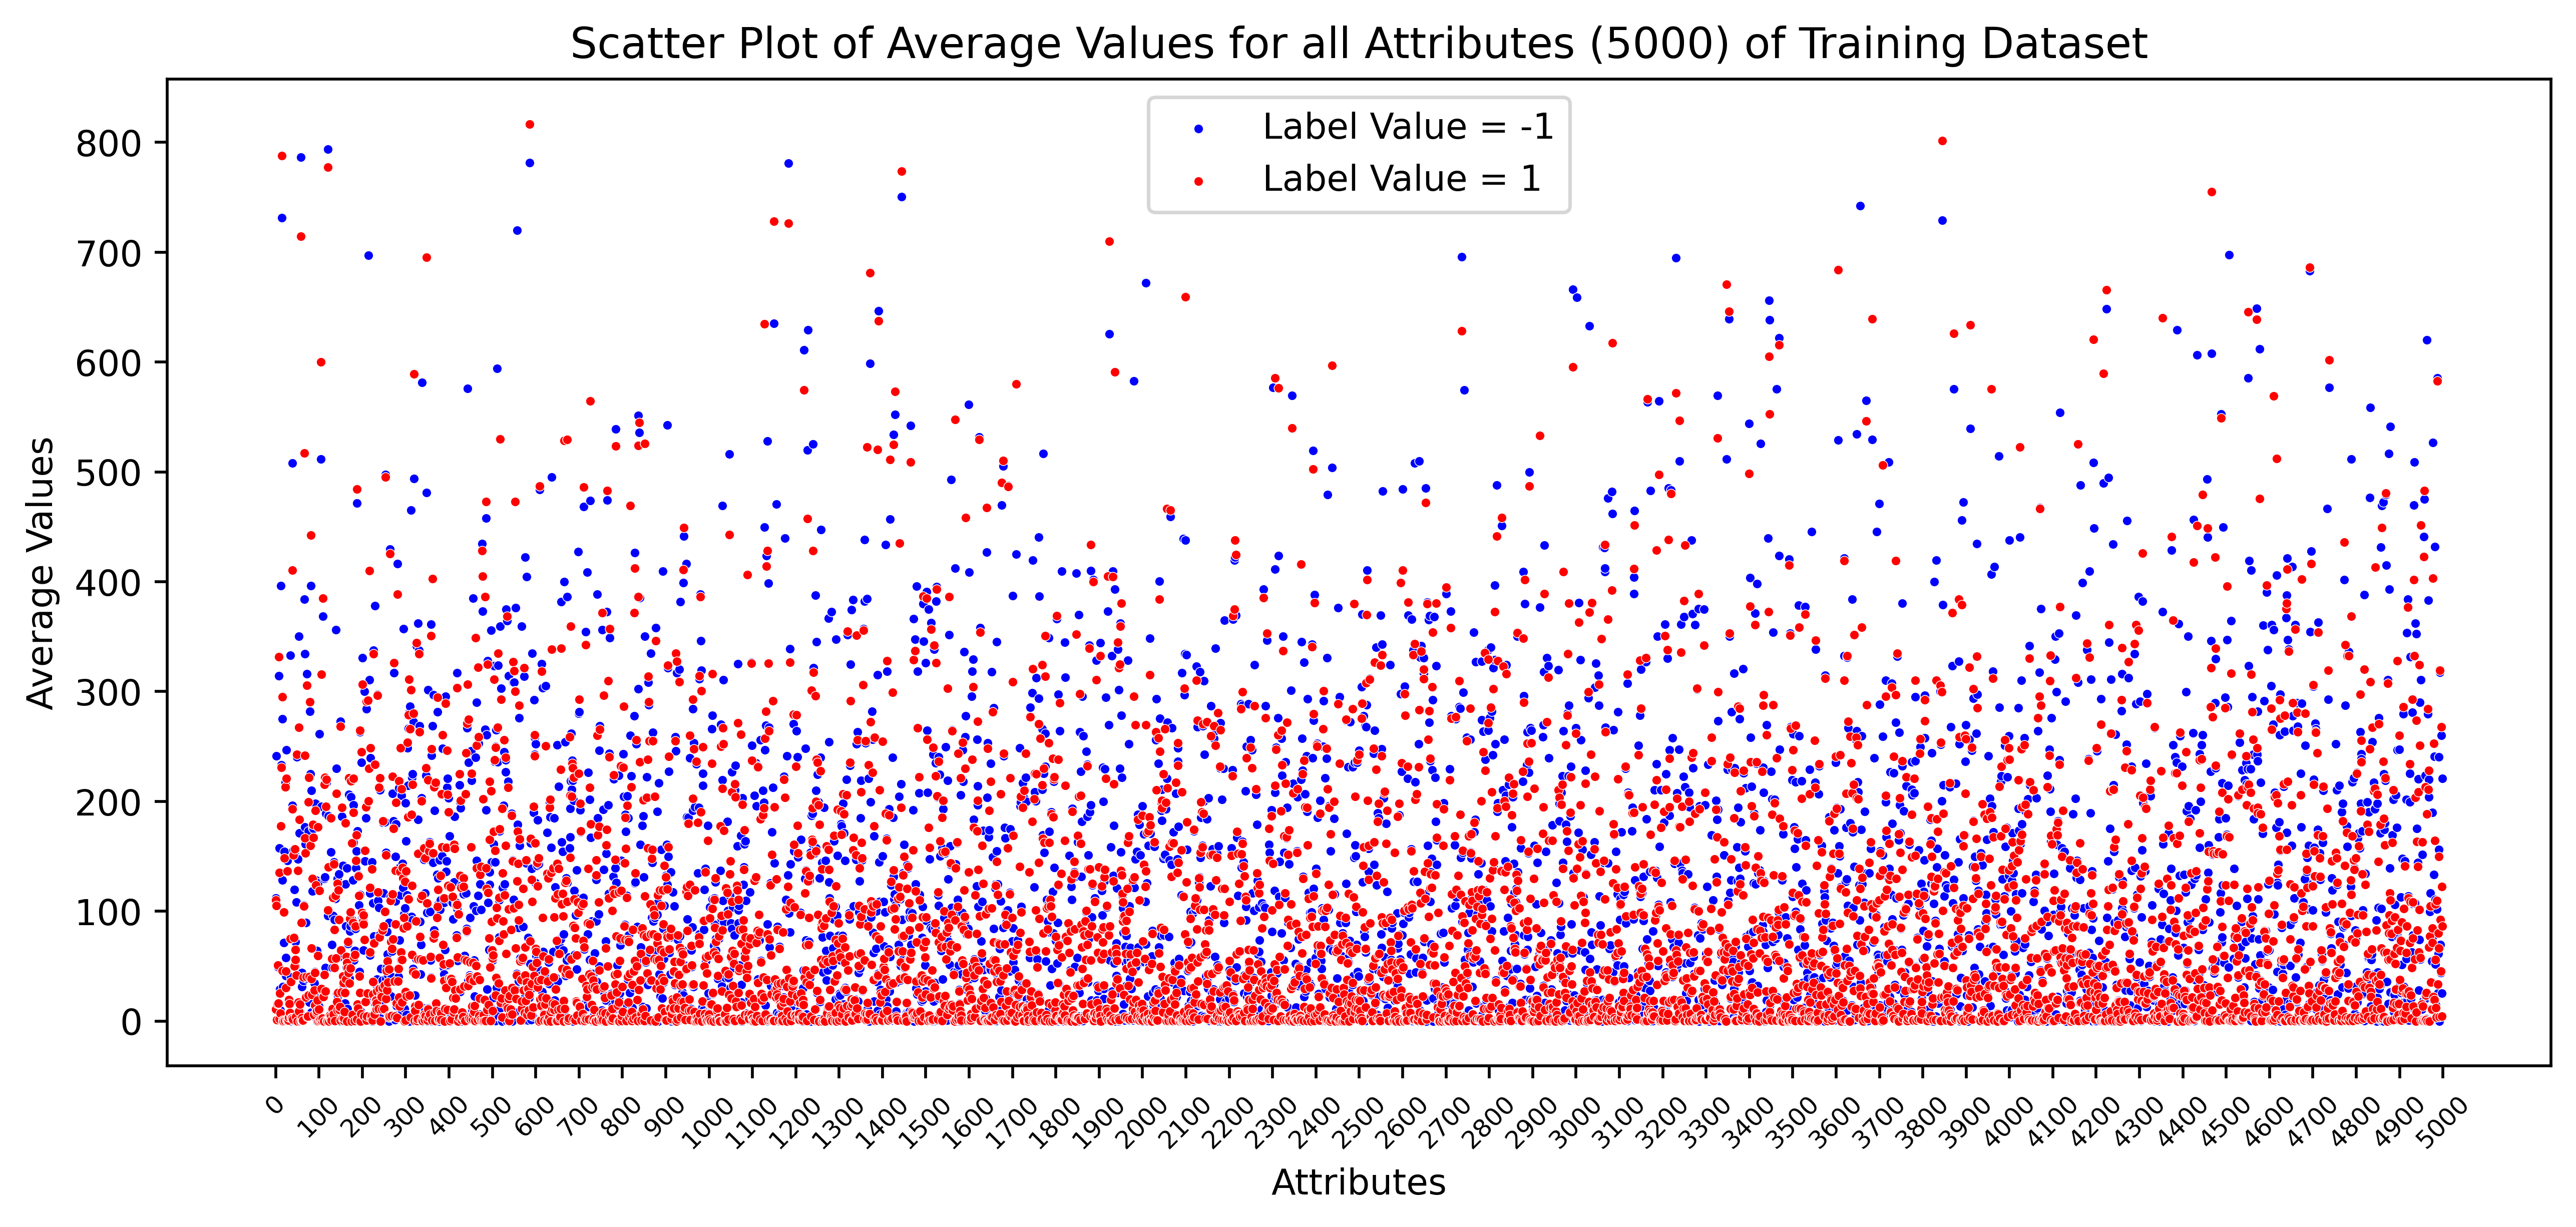

In [15]:
figure(figsize=(12, 5), dpi=512)

#---creating the scatter plot with different colored labels---
sns.scatterplot(x=x, y=y1, c='blue', s=7, label='Label Value = -1')
sns.scatterplot(x=x, y=y2, c='red', s=7, label='Label Value = 1')

plt.xlabel('Attributes')
plt.ylabel('Average Values')
plt.title('Scatter Plot of Average Values for all Attributes (5000) of Training Dataset')
plt.legend()
plt.xticks(ticks=np.arange(0,5001,100),labels=None,rotation=45,size=7)
plt.show()

#### Plotting the reduced dataset's feature mean values

In [16]:
reduced_train_set = reduced_train_labels.merge(reduced_train_data, left_index=True,
                                              right_index=True).rename(columns={0:'Label'})

reduced_averages = reduced_train_set.groupby('Label').mean().sort_index()

reduced_averages_transposed = reduced_averages.T  #---transposing the DataFrame---

#---plotting the reduced data's X-axis and Y-axis values---
x = reduced_averages_transposed.index
y1 = reduced_averages.values[0]
y2 = reduced_averages.values[1]

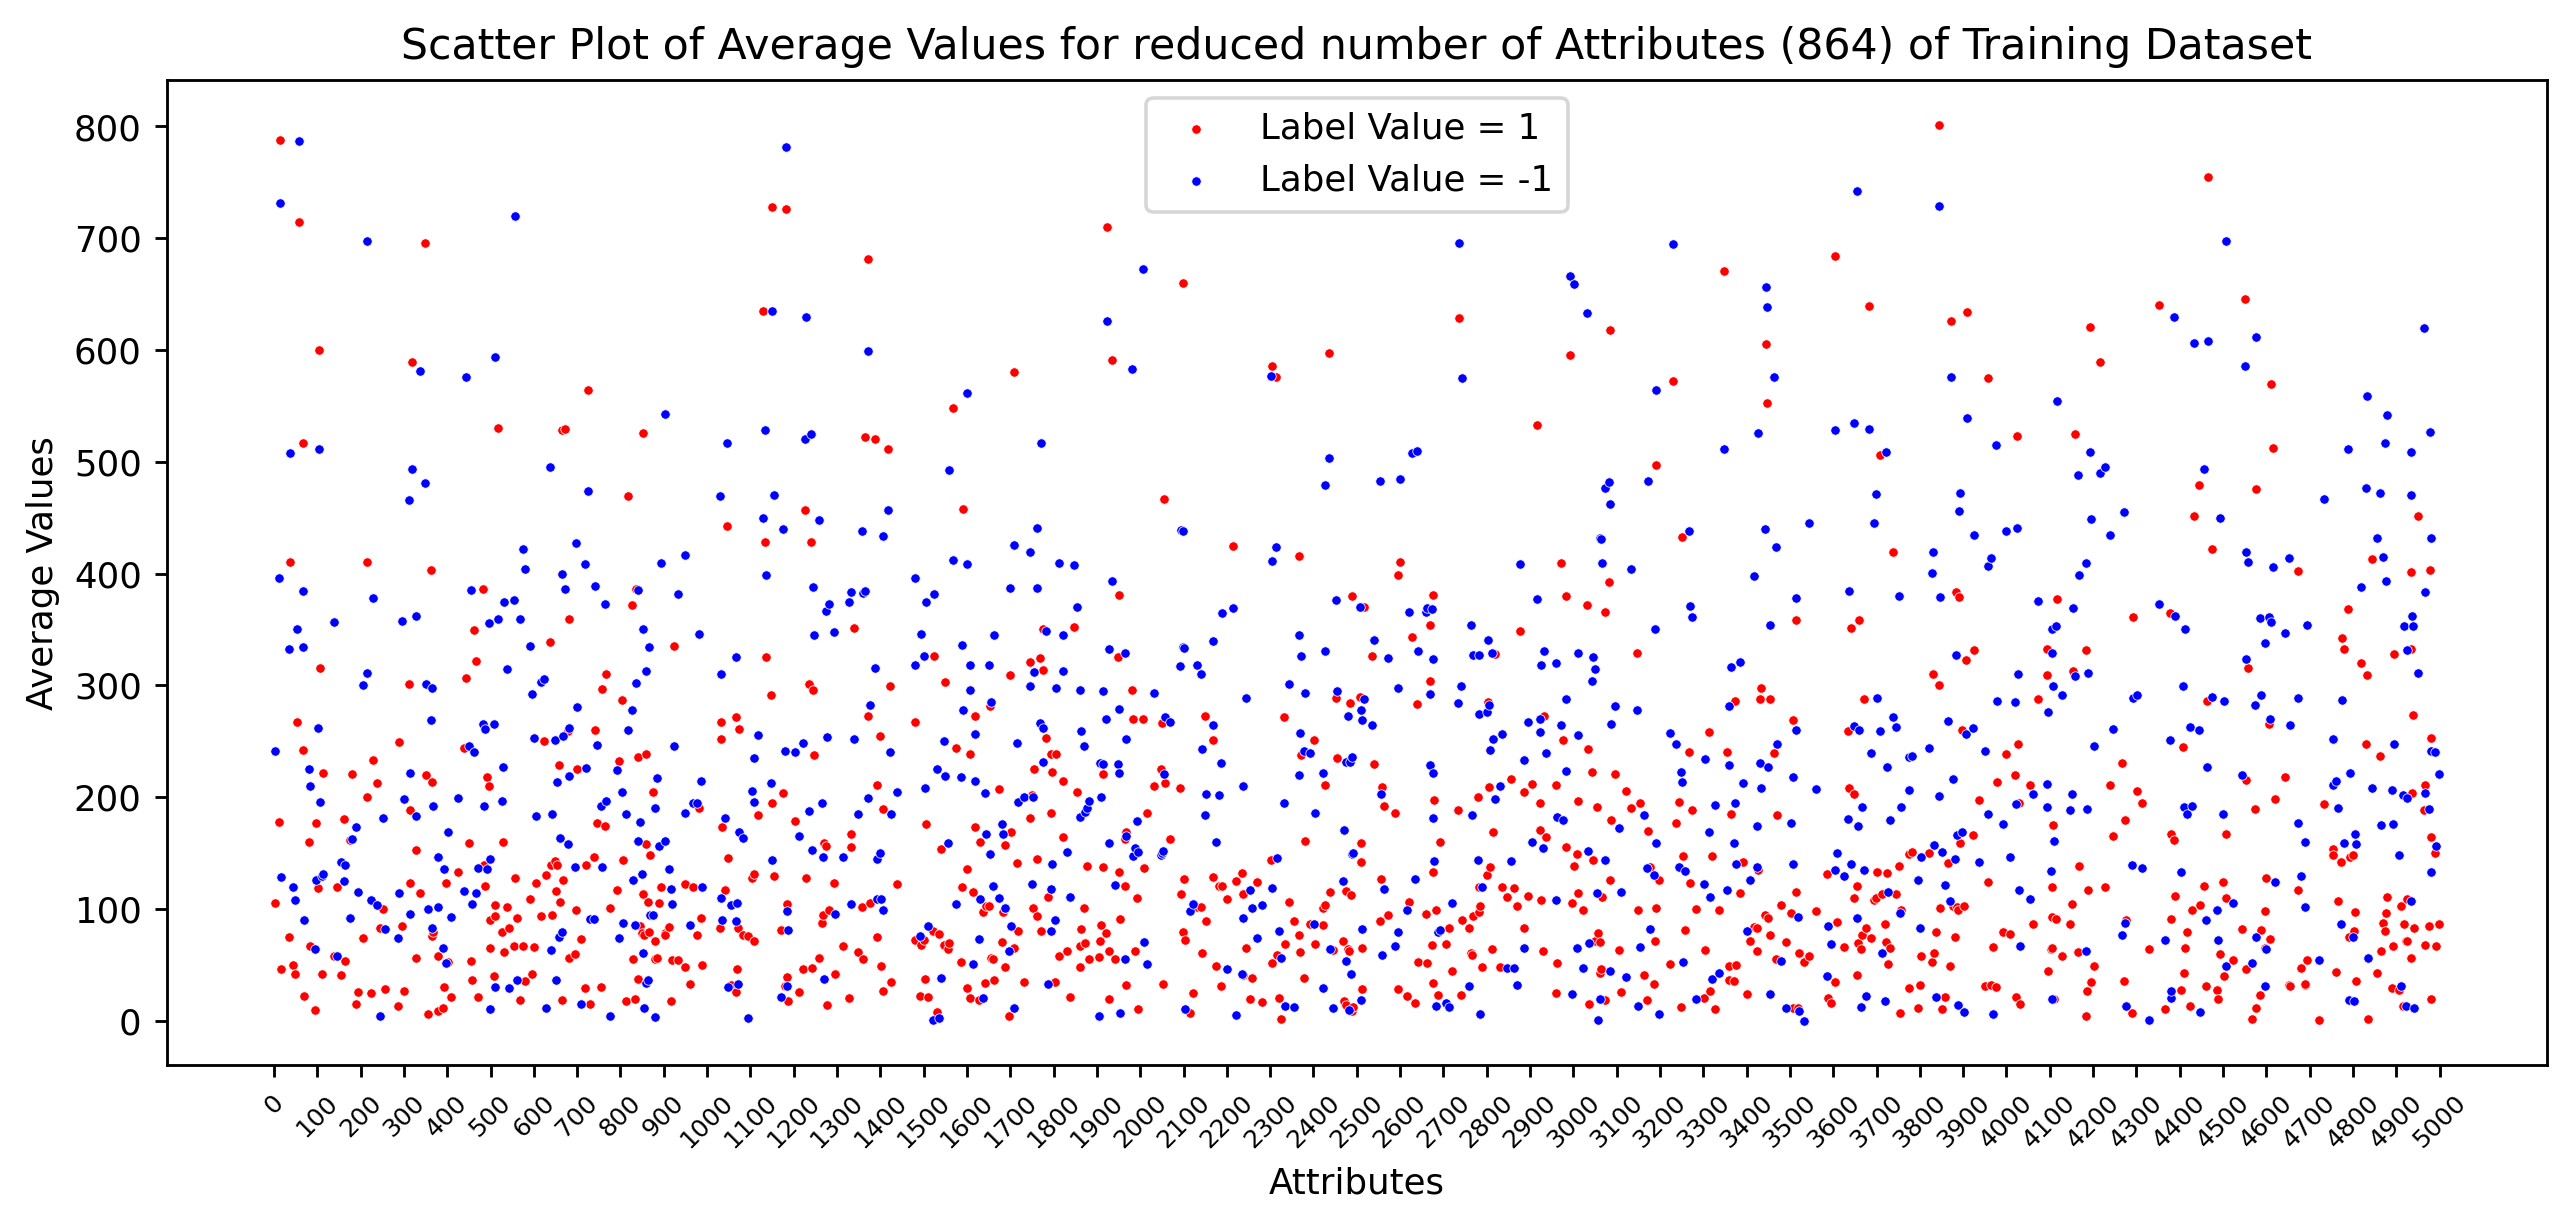

In [17]:
figure(figsize=(12, 5), dpi=256)

#---creating the scatter plot with different colored labels---
sns.scatterplot(x=x, y=y2, c='red', s=7, label='Label Value = 1')
sns.scatterplot(x=x, y=y1, c='blue', s=7, label='Label Value = -1')

plt.xlabel('Attributes')
plt.ylabel('Average Values')
plt.title('Scatter Plot of Average Values for reduced number of Attributes (864) of Training Dataset')
plt.legend()
plt.xticks(ticks=np.arange(0,5001,100), labels=None, rotation=45, size=7)
plt.show()

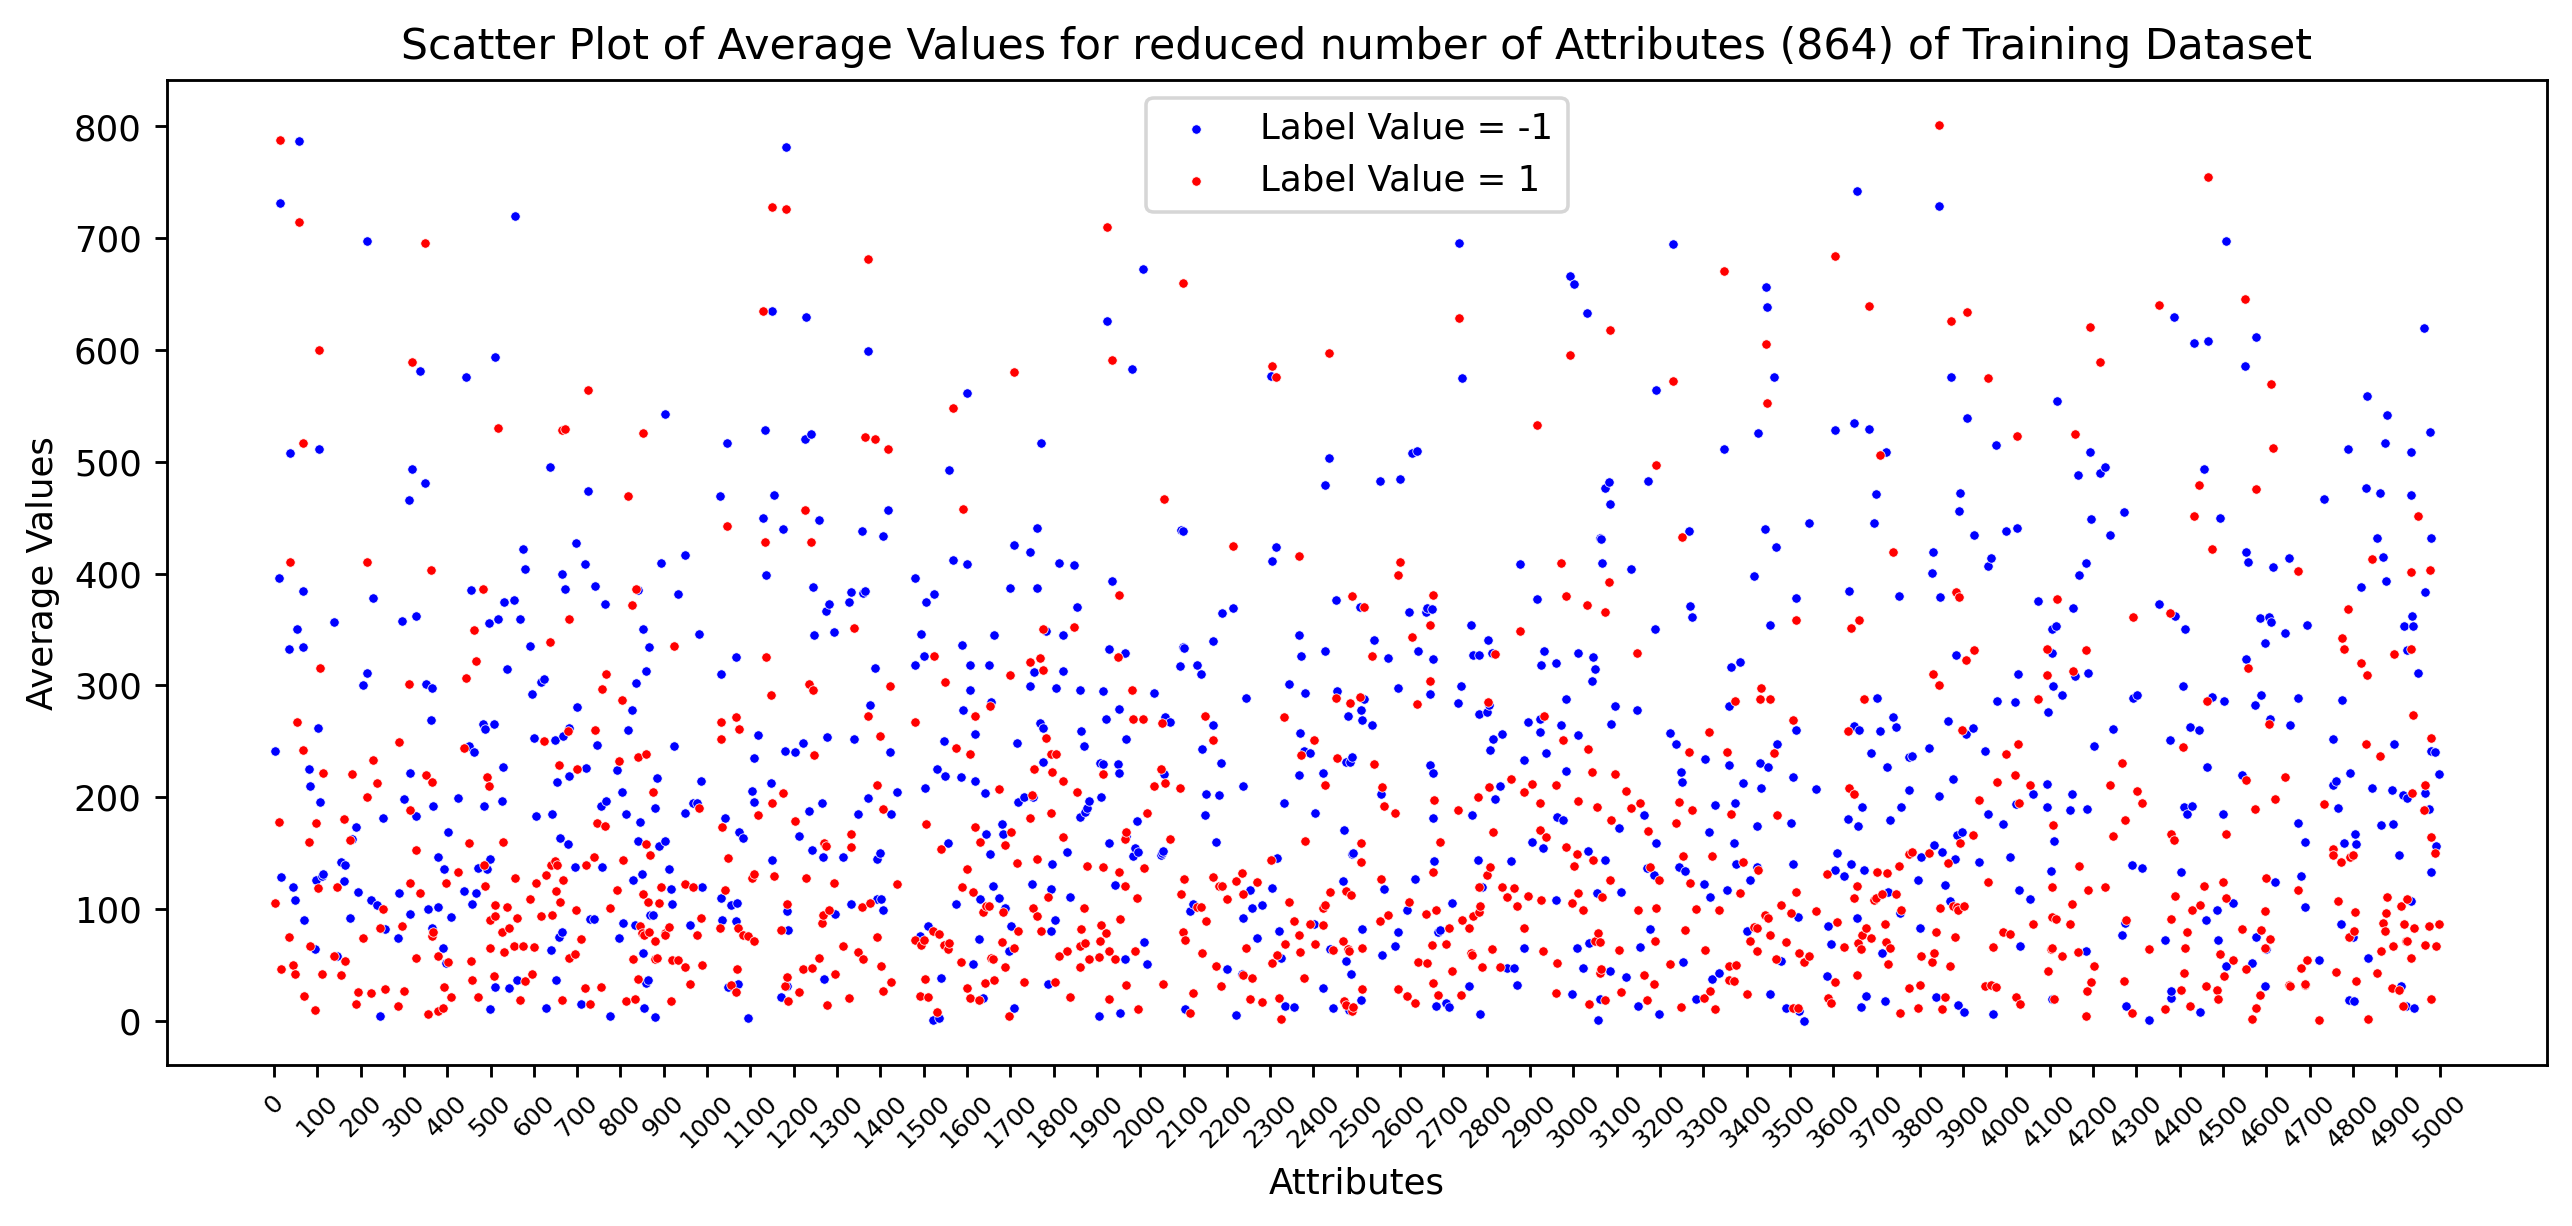

In [18]:
figure(figsize=(12, 5), dpi=256)

#---creating the scatter plot with different colored labels---
sns.scatterplot(x=x, y=y1, c='blue', s=7, label='Label Value = -1')
sns.scatterplot(x=x, y=y2, c='red', s=7, label='Label Value = 1')

plt.xlabel('Attributes')
plt.ylabel('Average Values')
plt.title('Scatter Plot of Average Values for reduced number of Attributes (864) of Training Dataset')
plt.legend()
plt.xticks(ticks=np.arange(0,5001,100), labels=None, rotation=45, size=7)
plt.show()

#### Reading the Testing Dataset and cleaning as needed

In [19]:
gisette_test_data = pd.read_csv('gisette_valid.data', delimiter=' ', header=None)
gisette_test_data = gisette_test_data.dropna(axis=1, how='all')

#---reducing the testing dataset based on the above criteria---
reduced_test_data = gisette_test_data[filt_diff.index]
reduced_test_data

,2,12,14,16,34,38,43,48,53,58,...,4966,4967,4976,4977,4979,4980,4981,4990,4991,4999
0,0,0,999,0,0,0,0,0,0,932,...,995,964,0,0,0,0,0,0,0,0
1,0,0,991,0,0,0,0,0,0,991,...,0,0,0,0,991,0,0,0,0,0
2,816,0,972,0,560,729,798,0,968,0,...,991,0,0,0,0,704,0,0,0,0
3,0,0,0,0,0,552,0,0,0,885,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,995,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,991,0,0,0,0,564,0,991,...,799,991,802,572,0,0,906,991,0,0
996,599,0,991,0,0,991,0,832,0,0,...,603,0,0,991,991,565,983,0,0,707
997,0,0,991,0,0,991,0,0,983,987,...,0,0,0,842,0,0,764,0,0,742
998,0,999,0,0,0,0,0,0,0,999,...,0,999,0,776,0,0,885,0,0,0


#### Reading True Positive & Negative Values (Labels) for the Testing Dataset

In [20]:
reduced_test_labels = pd.read_csv('gisette_valid.labels', delimiter=' ', header=None)

reduced_test_labels

,0
0,1
1,1
2,-1
3,1
4,1
...,...
995,-1
996,1
997,1
998,-1


#### Training a model using Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

start = time.time()  #---start time---

#---training the model using Logistic Regression---
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(reduced_train_data, np.ravel(reduced_train_labels))

#---evaluating the model on the training and testing datasets---
train_pred = log_reg.predict(reduced_train_data)
test_pred = log_reg.predict(reduced_test_data)

end = time.time()  #---end time---

print('Percentage Accuracy on the Training Data:', accuracy_score(reduced_train_labels, train_pred)*100)
print('Percentage Accuracy on the Testing Data:', accuracy_score(reduced_test_labels, test_pred)*100)
print('Processing Time (in seconds):', end-start)

Percentage Accuracy on the Training Data: 100.0
Percentage Accuracy on the Testing Data: 97.0
Processing Time (in seconds): 3.5194873809814453


#### Training a model using a linear kernel Support Vector Machine

In [22]:
from sklearn.svm import SVC

start = time.time()  #---start time---

#---training the model using Support Vector Machine with a linear kernel---
svm_linear = SVC(kernel='linear')
svm_linear.fit(reduced_train_data, np.ravel(reduced_train_labels))

#---evaluating the model on the training and testing datasets---
train_pred = svm_linear.predict(reduced_train_data)
test_pred = svm_linear.predict(reduced_test_data)

end = time.time()  #---end time---

print('Percentage Accuracy on the Training Data:', accuracy_score(reduced_train_labels, train_pred)*100)
print('Percentage Accuracy on the Testing Data:', accuracy_score(reduced_test_labels, test_pred)*100)
print('Processing Time (in seconds):', end-start)

Percentage Accuracy on the Training Data: 100.0
Percentage Accuracy on the Testing Data: 97.0
Processing Time (in seconds): 4.744166851043701


#### Training a model using a degree 2 polynomial kernel Support Vector Machine

In [23]:
start = time.time()  #---start time---

#---training the model using Support Vector Machine with a degree 2 polynomial kernel---
svm_poly_2 = SVC(kernel='poly', degree=2)
svm_poly_2.fit(reduced_train_data, np.ravel(reduced_train_labels))

#---evaluating the model on the training and testing datasets---
train_pred = svm_poly_2.predict(reduced_train_data)
test_pred = svm_poly_2.predict(reduced_test_data)

end = time.time()  #---end time---

print('Percentage Accuracy on the Training Data:', accuracy_score(reduced_train_labels, train_pred)*100)
print('Percentage Accuracy on the Testing Data:', accuracy_score(reduced_test_labels, test_pred)*100)
print('Processing Time (in seconds):', end-start)

Percentage Accuracy on the Training Data: 99.15
Percentage Accuracy on the Testing Data: 97.39999999999999
Processing Time (in seconds): 6.865170955657959


#### Training a model using a degree 3 polynomial kernel Support Vector Machine

In [24]:
start = time.time()  #---start time---

#---training the model using Support Vector Machine with a degree 3 polynomial kernel---
svm_poly_3 = SVC(kernel='poly', degree=3)
svm_poly_3.fit(reduced_train_data, np.ravel(reduced_train_labels))

#---evaluating the model on the training and testing datasets---
train_pred = svm_poly_3.predict(reduced_train_data)
test_pred = svm_poly_3.predict(reduced_test_data)

end = time.time()  #---end time---

print('Percentage Accuracy on the Training Data:', accuracy_score(reduced_train_labels, train_pred)*100)
print('Percentage Accuracy on the Testing Data:', accuracy_score(reduced_test_labels, test_pred)*100)
print('Processing Time (in seconds):', end-start)

Percentage Accuracy on the Training Data: 98.21666666666667
Percentage Accuracy on the Testing Data: 95.8
Processing Time (in seconds): 9.914133071899414


#### Training a model using a degree 4 polynomial kernel Support Vector Machine

In [25]:
start = time.time()  #---start time---

#---training the model using Support Vector Machine with a degree 4 polynomial kernel---
svm_poly_4 = SVC(kernel='poly', degree=4)
svm_poly_4.fit(reduced_train_data, np.ravel(reduced_train_labels))

#---evaluating the model on the training and testing datasets---
train_pred = svm_poly_4.predict(reduced_train_data)
test_pred = svm_poly_4.predict(reduced_test_data)

end = time.time()  #---end time---

print('Percentage Accuracy on the Training Data:', accuracy_score(reduced_train_labels, train_pred)*100)
print('Percentage Accuracy on the Testing Data:', accuracy_score(reduced_test_labels, test_pred)*100)
print('Processing Time (in seconds):', end-start)

Percentage Accuracy on the Training Data: 96.15
Percentage Accuracy on the Testing Data: 93.89999999999999
Processing Time (in seconds): 11.207742929458618


#### Reducing further and Plotting dataset's feature mean values to visulaize trends more clearly

In [26]:
filtered = diff[(diff < -150) | (diff > 150)]
filtered

12     -218.859333
34     -257.842667
139    -299.003333
189    -157.722000
205    -226.124000
           ...    
4936   -158.832000
4963   -431.476667
4966   -172.590333
4980   -221.301333
4981   -267.497000
Length: 270, dtype: float64

In [27]:
reduced_train_set = reduced_train_labels.merge(reduced_train_data[filtered.index], left_index=True,
                                              right_index=True).rename(columns={0:'Label'})

reduced_averages = reduced_train_set.groupby('Label').mean().sort_index()

reduced_averages_transposed = reduced_averages.T  #---transposing the DataFrame---

#---plotting the reduced data's X-axis and Y-axis values---
x = reduced_averages_transposed.index
y1 = reduced_averages.values[0]
y2 = reduced_averages.values[1]

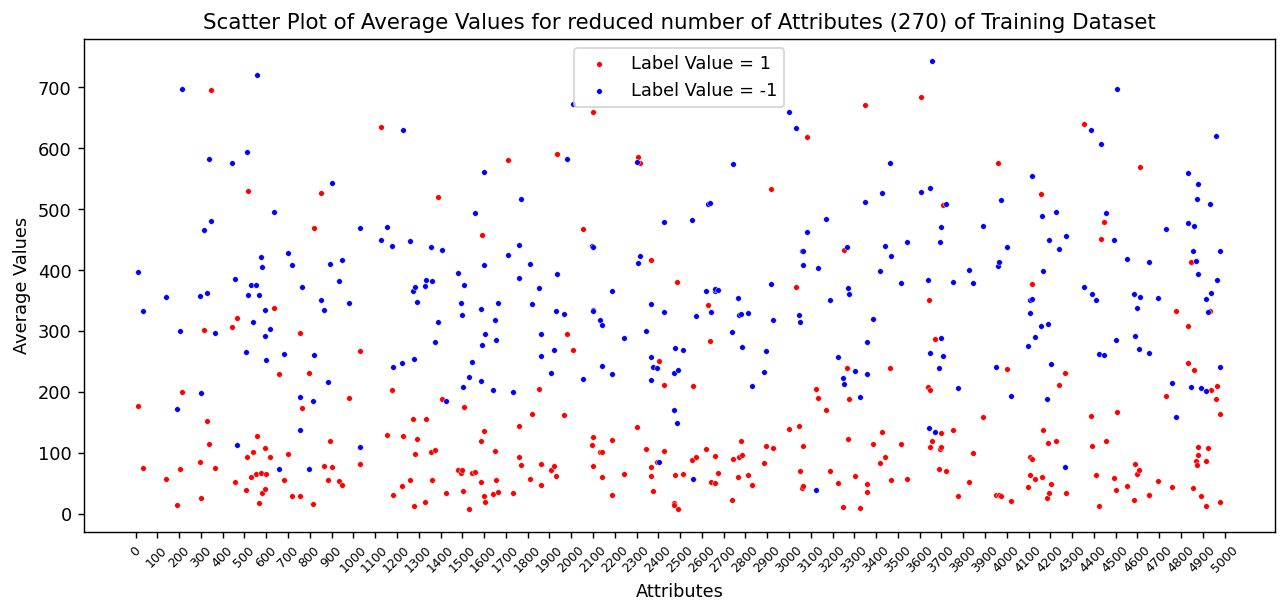

In [28]:
figure(figsize=(12, 5), dpi=128)

#---creating the scatter plot with different colored labels---
sns.scatterplot(x=x, y=y2, c='red', s=10, label='Label Value = 1')
sns.scatterplot(x=x, y=y1, c='blue', s=10, label='Label Value = -1')

plt.xlabel('Attributes')
plt.ylabel('Average Values')
plt.title('Scatter Plot of Average Values for reduced number of Attributes (270) of Training Dataset')
plt.legend()
plt.xticks(ticks=np.arange(0,5001,100), labels=None, rotation=45, size=7)
plt.show()